In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)
print(X_train.shape)

(10000, 1)
(50000, 1)
(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [5]:
y_test

#array([[3],
#       [8],
#       [8],
#       ...,
#       [5],
#       [1],
#       [7]], dtype=uint8)

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [7]:
y_test

#array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

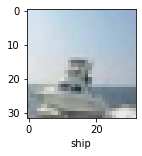

In [9]:
plot_sample(X_train, y_train, 100)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train[3][31]

array([[0.38039216, 0.30588235, 0.21960784],
       [0.36862745, 0.29411765, 0.20784314],
       [0.36470588, 0.29411765, 0.20784314],
       [0.38039216, 0.33333333, 0.23921569],
       [0.37647059, 0.3372549 , 0.23921569],
       [0.36862745, 0.32941176, 0.23137255],
       [0.37647059, 0.3372549 , 0.23921569],
       [0.30980392, 0.27843137, 0.17254902],
       [0.30588235, 0.27058824, 0.15686275],
       [0.36470588, 0.30588235, 0.19215686],
       [0.41176471, 0.32941176, 0.20784314],
       [0.41960784, 0.3372549 , 0.21960784],
       [0.38431373, 0.33333333, 0.22745098],
       [0.38823529, 0.3254902 , 0.22352941],
       [0.41568627, 0.34117647, 0.24313725],
       [0.46666667, 0.38431373, 0.29019608],
       [0.40784314, 0.34509804, 0.24313725],
       [0.40784314, 0.33333333, 0.22745098],
       [0.41568627, 0.33333333, 0.21568627],
       [0.47843137, 0.38823529, 0.2627451 ],
       [0.41960784, 0.33333333, 0.21176471],
       [0.43921569, 0.37647059, 0.25882353],
       [0.

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#ann = models.Sequential([
#        layers.Flatten(input_shape=(32,32,3)),
#        layers.Dense(3000, activation='relu'),
#        layers.Dense(1000, activation='relu'),
#        layers.Dense(10, activation='softmax')    
#    ])

#ann.compile(optimizer='SGD',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

#ann.fit(X_train, y_train, epochs=5)

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5193 - accuracy: 0.4513
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1465 - accuracy: 0.5940
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0125 - accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9325 - accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8715 - accuracy: 0.6979
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8233 - accuracy: 0.7124
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7827 - accuracy: 0.7274
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7436 - accuracy: 0.7434
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7114 - accuracy: 0.7528
Epoch 10/10
1563/1563 [==============================] - 54s 35m

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 12ms/step - loss: 0.9384 - accuracy: 0.6899


[0.9383512735366821, 0.6898999810218811]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[1.41539797e-03, 1.47121755e-04, 1.29904542e-02, 5.28781891e-01,
        1.42815977e-03, 3.31306934e-01, 9.14262682e-02, 6.30796130e-05,
        3.23370248e-02, 1.03628649e-04],
       [5.71839698e-03, 7.85546284e-03, 1.24382700e-06, 2.70529856e-08,
        1.55439981e-08, 1.63488126e-10, 5.42437872e-10, 5.71090508e-09,
        9.86155927e-01, 2.68924778e-04],
       [5.52442893e-02, 3.53846610e-01, 7.04405922e-03, 4.46636463e-03,
        5.86247724e-03, 5.25982876e-04, 1.76395790e-03, 2.78440956e-03,
        4.44243580e-01, 1.24218315e-01],
       [9.24469829e-01, 6.39223540e-03, 2.42562965e-02, 2.66827963e-04,
        4.03905800e-03, 1.18100149e-06, 5.33276125e-06, 2.29662604e-04,
        3.97932902e-02, 5.46297990e-04],
       [4.56635325e-06, 1.88371141e-05, 2.72603054e-02, 6.34797290e-02,
        1.81534082e-01, 4.91089141e-03, 7.22375989e-01, 9.91642764e-07,
        4.09611122e-04, 4.98124291e-06]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

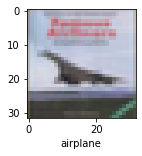

In [19]:
plot_sample(X_test, y_test,3)

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=np.array(y_classes))
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[738,  18,  48,  15,  15,   6,   9,  11, 102,  38],
       [ 28, 790,   5,   9,   3,  12,   6,   7,  41,  99],
       [ 83,  10, 559,  43,  69, 114,  42,  54,  14,  12],
       [ 31,  14,  77, 417,  50, 269,  49,  60,  15,  18],
       [ 34,   7,  78,  66, 580,  61,  56, 100,  13,   5],
       [ 18,   4,  51, 114,  27, 699,  18,  52,  10,   7],
       [ 10,  10,  53,  66,  42,  50, 738,  15,   9,   7],
       [ 17,   6,  31,  21,  49,  83,   7, 762,   2,  22],
       [ 46,  39,  14,  11,   8,  14,   5,   6, 827,  30],
       [ 33,  68,  10,  11,  10,  16,   6,  19,  38, 789]])>

Text(69.0, 0.5, 'Truth')

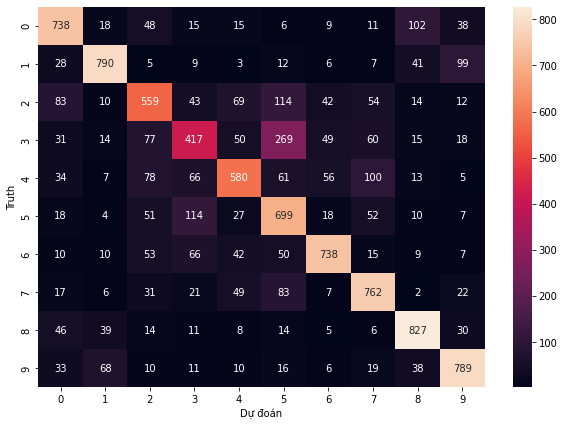

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Dự đoán')
plt.ylabel('Truth')